Welcome to Zomato Bengaluru Restaurants EDA.

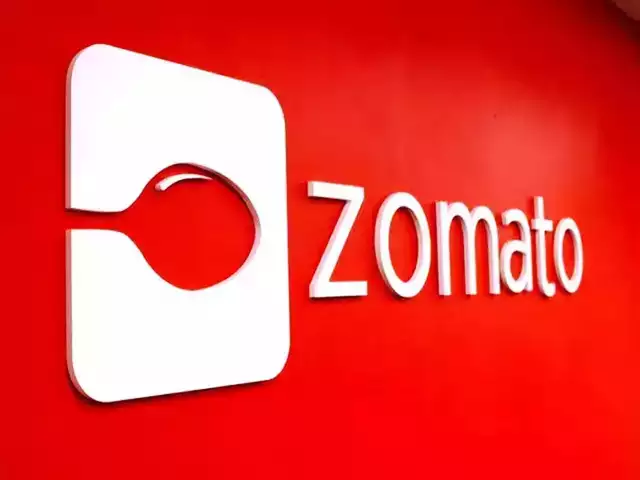 

We are going to see things like good quality restaurants, which food is available at minimum rate, the hotels best food items, where we can go for corporate parties and etc.




# Content
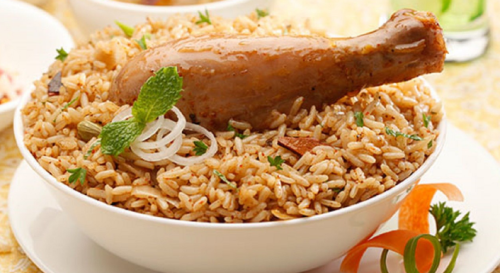
1. basic exploration about each category : based on rating, price, food items, place of the hotel, branded restaurants, online order and etc.
2. relationship between the rate and cost

yet to come
1. where we can have quality food item with optimal price
2. where we can go for corporate parties
3. finding the nearest resataurant with good food.
and more things come soon..


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import numpy as np
import plotly.graph_objs as go
from matplotlib import rcParams
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
plt.figure(figsize=(16, 10))

# Data Loading
## Basics about dataset

In [ ]:
data = pd.read_csv("../input/zomato.csv")
print("************************ Data Shape *************************")
print(data.shape)
print("************************ Data Size *************************")
print(data.size)
print("************************ Data Sample *************************")
data.head(2)

**Data Quality Check**

In [ ]:
# get the percentage of nulls in each columns
data.isnull().sum()/len(data)*100

**list of original columns**

In [ ]:
data.columns

In [ ]:
# Change the confusing columns name to understandable and usable one.
data = data.rename(columns = {'approx_cost(for two people)':'average_cost','listed_in(type)':'hotel_type','listed_in(city)':'place'})

**list of modified columns**

In [ ]:
data.columns

In [ ]:
# removing unuseful columns like url, address, phone
data = data.drop(['url','address','phone','location'], axis = 1)

# Data Cleaning

In [ ]:
# Rate and average_cost

data.rate = data.rate.replace("NEW", '0')
data.rate = data.rate.replace("-", '0')
#data.dropna(how ='any', inplace = True)
data.rate = data.rate.astype(str)
data.rate = data.rate.apply(lambda x: x.replace('/5',''))
data.rate = data.rate.apply(lambda x: float(x))
data.average_cost = data.iloc[:,8].str.replace(',', '').astype(float)

In [ ]:
data.dish_liked = data.dish_liked.replace(np.nan, 'No Dish', regex=True)

In [ ]:
# to remove the space from the list of liked dishes
main_list = []
separator = ','
for item in data.dish_liked:
    item_list = item.split(',')
    new_list = []
    for it in item_list:        
        str_content = it.strip()
        new_list.append(str_content)        
    main_list.append(separator.join(sorted(new_list)))
data['new_dish'] = main_list
data['new_dish'][0]

In [ ]:
# to remove the space from the list of liked dishes
data.cuisines = data.cuisines.replace(np.nan, 'No Cuisines', regex=True)
main_list = []
separator = ','
for item in data.cuisines:
    item_list = item.split(',')
    new_list = []
    for it in item_list:        
        str_content = it.strip()
        new_list.append(str_content)        
    main_list.append(separator.join(sorted(new_list)))
data['new_cuisines'] = main_list
data['new_cuisines'][0]

# Visualization with Story

In [ ]:
# Visualization
location_count = data.groupby(['place']).size().reset_index(name="count")
location_count = location_count.sort_values('count',ascending = True)
location_count.head()

In [ ]:
inputdata = [go.Bar(
            x=location_count['place'],
            y=location_count['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

##  Core city areas like *BTM, Koramangala, Jaya Nagar, JP Nagar* are having the higher number of restaurants. the one good thing is almost through out the city, there are good number of restaurants. whcih means, **bengaluru is best for Foodies.**

In [ ]:
rate_group_count = data.groupby(['rate']).size().reset_index(name="count")
rate_group_count = rate_group_count.sort_values('count',ascending = True)
rate_group_count.head()

In [ ]:
inputdata = [go.Bar(
            x=rate_group_count['rate'],
            y=rate_group_count['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

# Most people rated 3.9
## the range of good rating is starts from 3.0 to 4.4 (atleast above 1000 members voted)
## 2277 is 0 voted. it might be newly opened hotel or data missing
## so the **food quality, service, location of the restaurants** are good.

In [ ]:
name_group_count = data.groupby(['name']).size().reset_index(name="count")
name_group_count = name_group_count.sort_values('count',ascending = False)
#name_group_count.head()
top20 = name_group_count[0:20]
top20

In [ ]:
inputdata = [go.Bar(
            x=top20['name'],
            y=top20['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

# Top 20 Brand names of Restaurants
## Cafe coffee day tops in the list. almost all the top 20 brands are chit chat items. basically **bengaluru is a busy bees home**.

In [ ]:
# Online Order availability
online_group_count = data.groupby(['online_order']).size().reset_index(name="count")
trace = go.Pie(labels=online_group_count['online_order'], values=online_group_count['count'])
py.iplot([trace], filename='basic_pie_chart')

# Basically Zomato is an online order platform. out of this, 59% of hotels having the direct online order options.

In [ ]:
# Table Booking availability
online_group_count = data.groupby(['book_table']).size().reset_index(name="count")
trace = go.Pie(labels=online_group_count['book_table'], values=online_group_count['count'])
py.iplot([trace], filename='basic_pie_chart')

## Booking table option is very low. only 12.5% of hotels are allowing the Table booking.
## The real scenario is, that 12.5% hotels are comes under the luxury category. will explore further.

In [ ]:
votes_group_count = data.groupby(['new_dish']).size().reset_index(name="count")
votes_group_count = votes_group_count.sort_values('count',ascending = False)
top20 = votes_group_count[1:50]
inputdata = [go.Bar(
            x=top20['new_dish'],
            y=top20['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

## Wow...

## **Briyani** tops in the list. almost all south indian, north indian restaurants default items is briyani

In [ ]:
cuisines_group_count = data.groupby(['new_cuisines']).size().reset_index(name="count")
cuisines_group_count = cuisines_group_count.sort_values('count',ascending = False)
top20 = cuisines_group_count[0:10]
inputdata = [go.Bar(
            x=top20['new_cuisines'],
            y=top20['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

## Higher number of North indian and Chinese Restauranst then followed by South Indian.

In [ ]:
#average_cost
average_cost_group_count = data.groupby(['average_cost']).size().reset_index(name="count")
average_cost_group_count = average_cost_group_count.sort_values('average_cost',ascending = False)
top20 = average_cost_group_count[0:50]
inputdata = [go.Bar(
            x=top20['average_cost'],
            y=top20['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

## The average price range is **200 to 600**. 300 is the highest ever. Good for middle class foodies few hotels are having the prices in the 1000s :)

In [ ]:
hotel_type_group_count = data.groupby(['hotel_type']).size().reset_index(name="count")
hotel_type_group_count = hotel_type_group_count.sort_values('count',ascending = True)
top20 = hotel_type_group_count[:]
inputdata = [go.Bar(
            x=top20['hotel_type'],
            y=top20['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

## 50% of people Sitting at home and ordered the food from Hotel. very few people only going for Pubs and Bars :)

In [ ]:
hotel_type_group_count = data.groupby(['hotel_type']).size().reset_index(name="count")
hotel_type_group_count = hotel_type_group_count.sort_values('count',ascending = True)
trace = go.Pie(labels=hotel_type_group_count['hotel_type'], values=hotel_type_group_count['count'])
py.iplot([trace], filename='basic_pie_chart')

# Correlation between the features

In [ ]:
# Create a trace
trace = go.Scatter(
    x = data.rate,
    y = data.average_cost,
    mode = 'markers'
)
data = [trace]
# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

## Most of the highly rating food items priced in the range of 100 to 2000 INR. few costliest food items with the price range of 3000 to 6000 INR have good ratings of above 4

In [ ]:
data['online_encode'] = data.online_order.map({'Yes':1,'No':0})

In [ ]:
trace0 = go.Scatter(
    x=data.online_encode,
    y=data.average_cost,
    mode='markers',
    marker=dict(color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100],
    )
)

in_data = [trace0]
py.iplot(in_data, filename='bubblechart-color')

## More to taste......

## If you like it plz ***Upvote***
## If you have suggestions, Plz ***Comment***

# Happy Learning :)